# **Credits**
Creator: Long Vo <br>
Date: 09/20/2022 <br>
<br>
All the following math equations below are from article "Simple Model of Spiking Neurons" by Eugene M.Izhikevich

In [33]:
# import the following libraries so the code can run smoothly
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# <font color='skyblue'>Problem 1: Regular Spiking Neuron</font>

In [34]:
# define needed variables
steps = 1000
a = 0.02
b = 0.2
c = -65
d = 8
V = -64
TAU = 0.25
u = b * V

## Full 1000-step-time-series of membrane potential v for I = 1, 10, 30, 40

In [35]:
'''
This is the function use for both problem 1 and 2.

The function use to add data to DataFrame for plotting as well as
calculate the mean firing rate of spiking neuron.
'''
def neuron_spiking(row, a, b, c, d, u, V, VV, uu, spike_ts, T1=0, I=0.0):
    for t in np.linspace(0, steps, 4001): # 4001 since we need to draw 5 charts
        # equations by Izhikevich
        V += TAU * (0.04 * (V**2) + 5 * V + 140 - u + (I*1.0))
        u += TAU * a * (b * V - u)
        if V > 30:
            VV.append(30)
            V = c
            u = u + d
            spike_ts.append(1)
        else:
            VV.append(V)
            spike_ts.append(0)
        uu.append(u)
        
    data_frame[row] = pd.DataFrame({'x' : np.linspace(0, steps, 4001), 'VV' : VV})
    plt.xlabel('Time Steps', fontsize=15)
    return sum(spike_ts[800:])/800

### Plot of VV over Steps

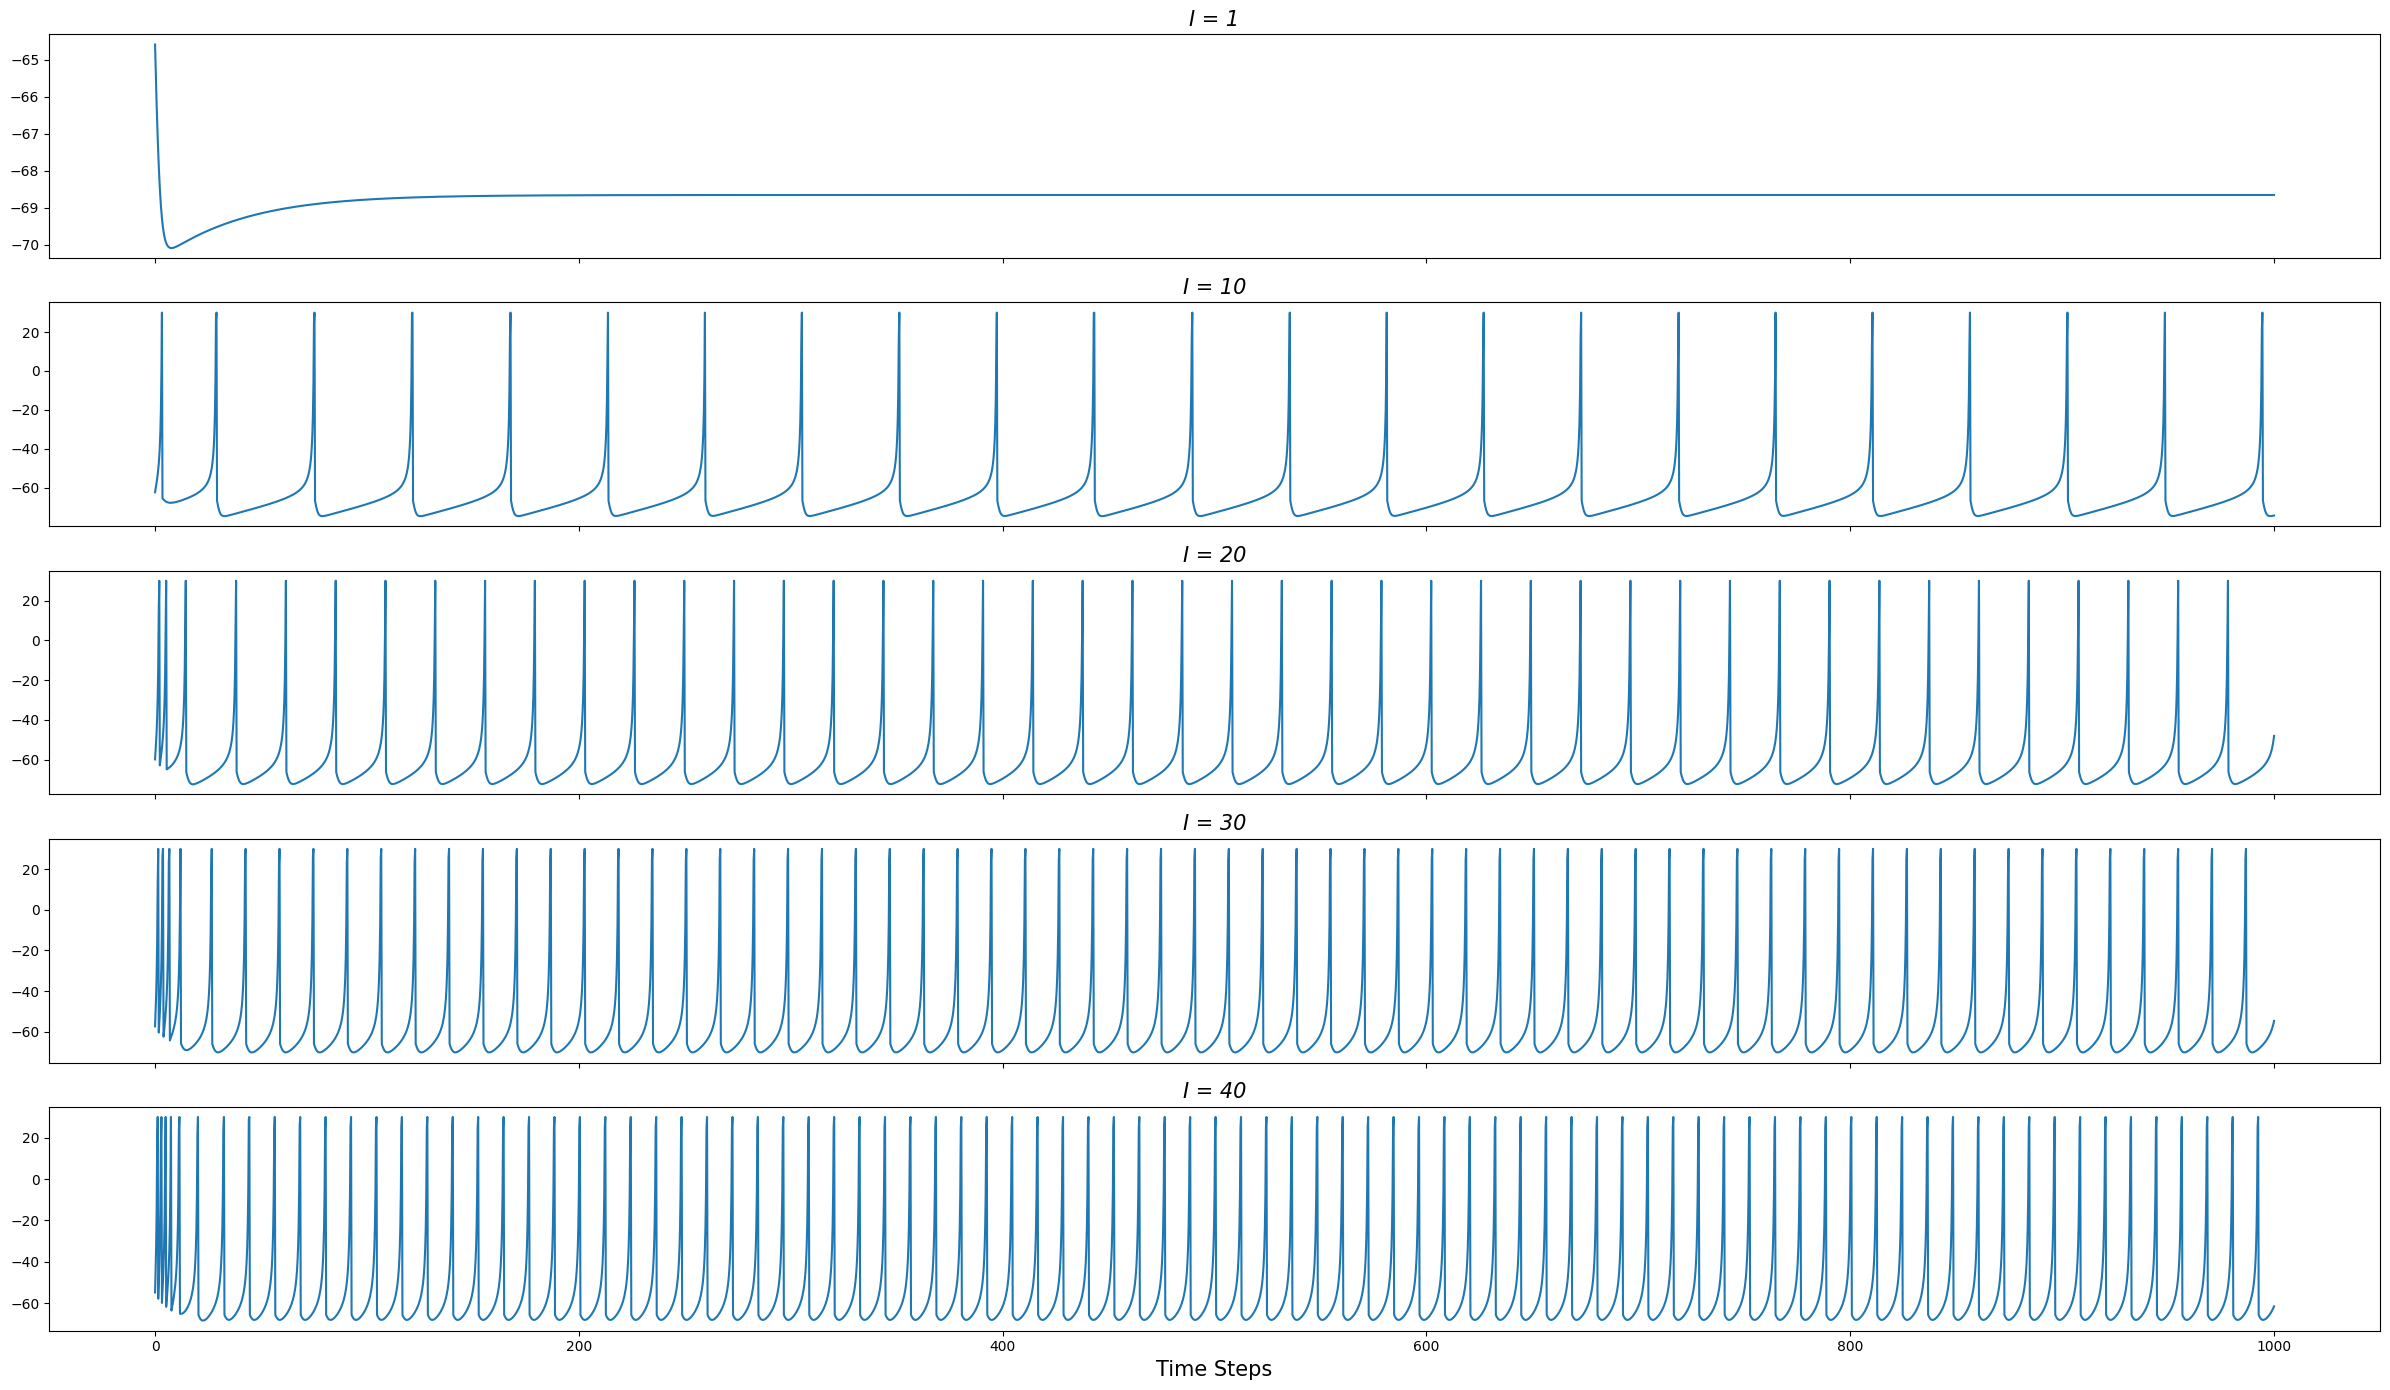

In [36]:
data_frame = [0 for _ in range(5)]
fig, axis = plt.subplots(len(data_frame), 1, sharex=True, figsize=(24,14), squeeze=False)
row = 0
II = [1, 10, 20, 30, 40]
RR = []
for i in II:
    R = neuron_spiking(row, a, b, c, d, u, V, [], [], [], I=i)
    row += 1
    RR.append(R)

count = 0    
for j in data_frame:
    axis[count, 0].set_title(f'I = {II[count]}', fontstyle='italic', fontsize=15)
    axis[count, 0].plot(data_frame[count]['x'],data_frame[count]['VV'])
    count += 1    
plt.savefig('../assets/problem1a.png')
plt.tight_layout()
plt.show()

## Mean firing rate of spiking neuron

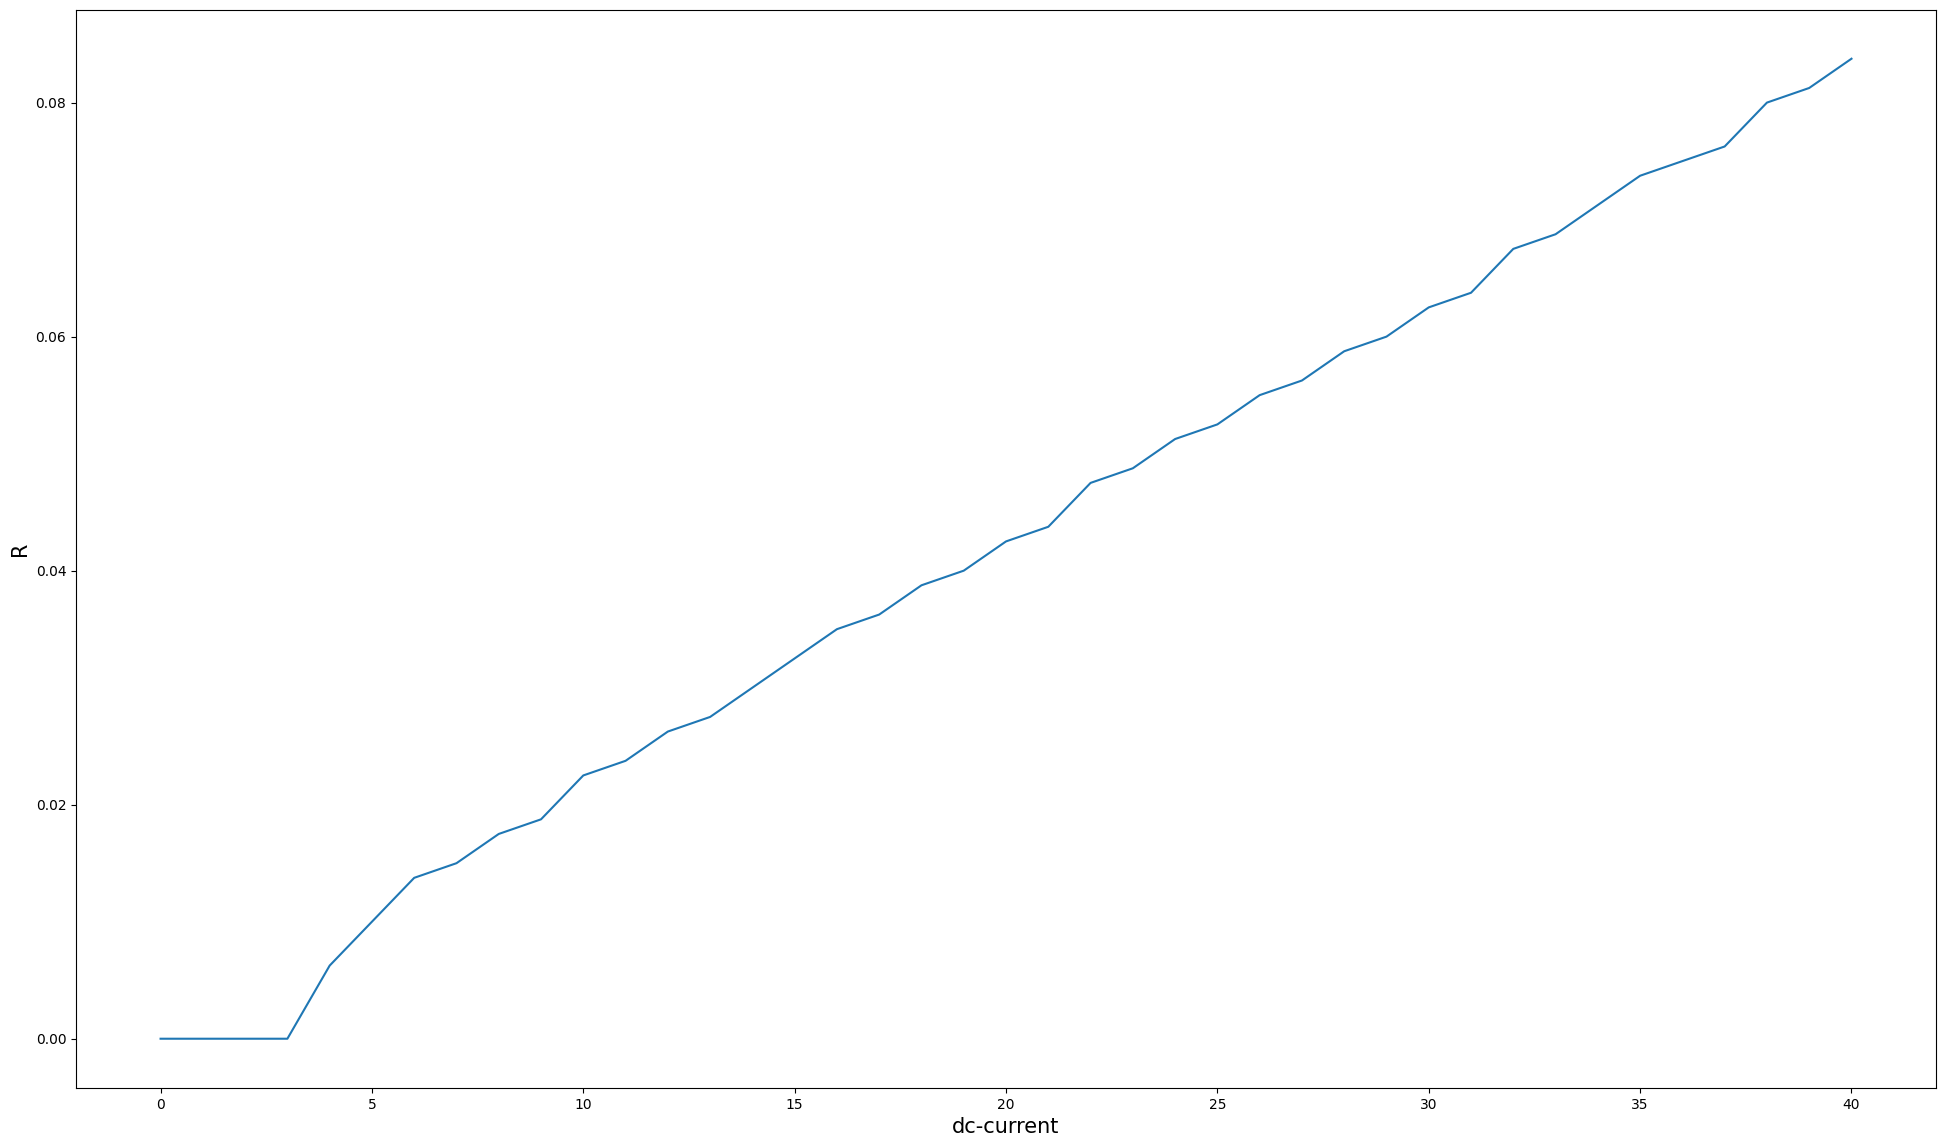

In [37]:
data_frame = [0 for _ in range(41)]
avg_lst = [i for i in range(41)]
fig, ax = plt.subplots(1,1,sharex=True, figsize=(24,14))
rr = []
row = 0
for i in avg_lst:
    R = neuron_spiking(row, a, b, c, d, u, V, [], [], [], I=i)
    row += 1
    rr.append(R)
plt.plot(avg_lst, rr)
plt.xlabel('dc-current', fontsize=15)
plt.ylabel('R', fontsize=15)
plt.savefig('../assets/problem1b.png')

# <font color='skyblue'>Problem 2: Fast Spiking Neuron</font>

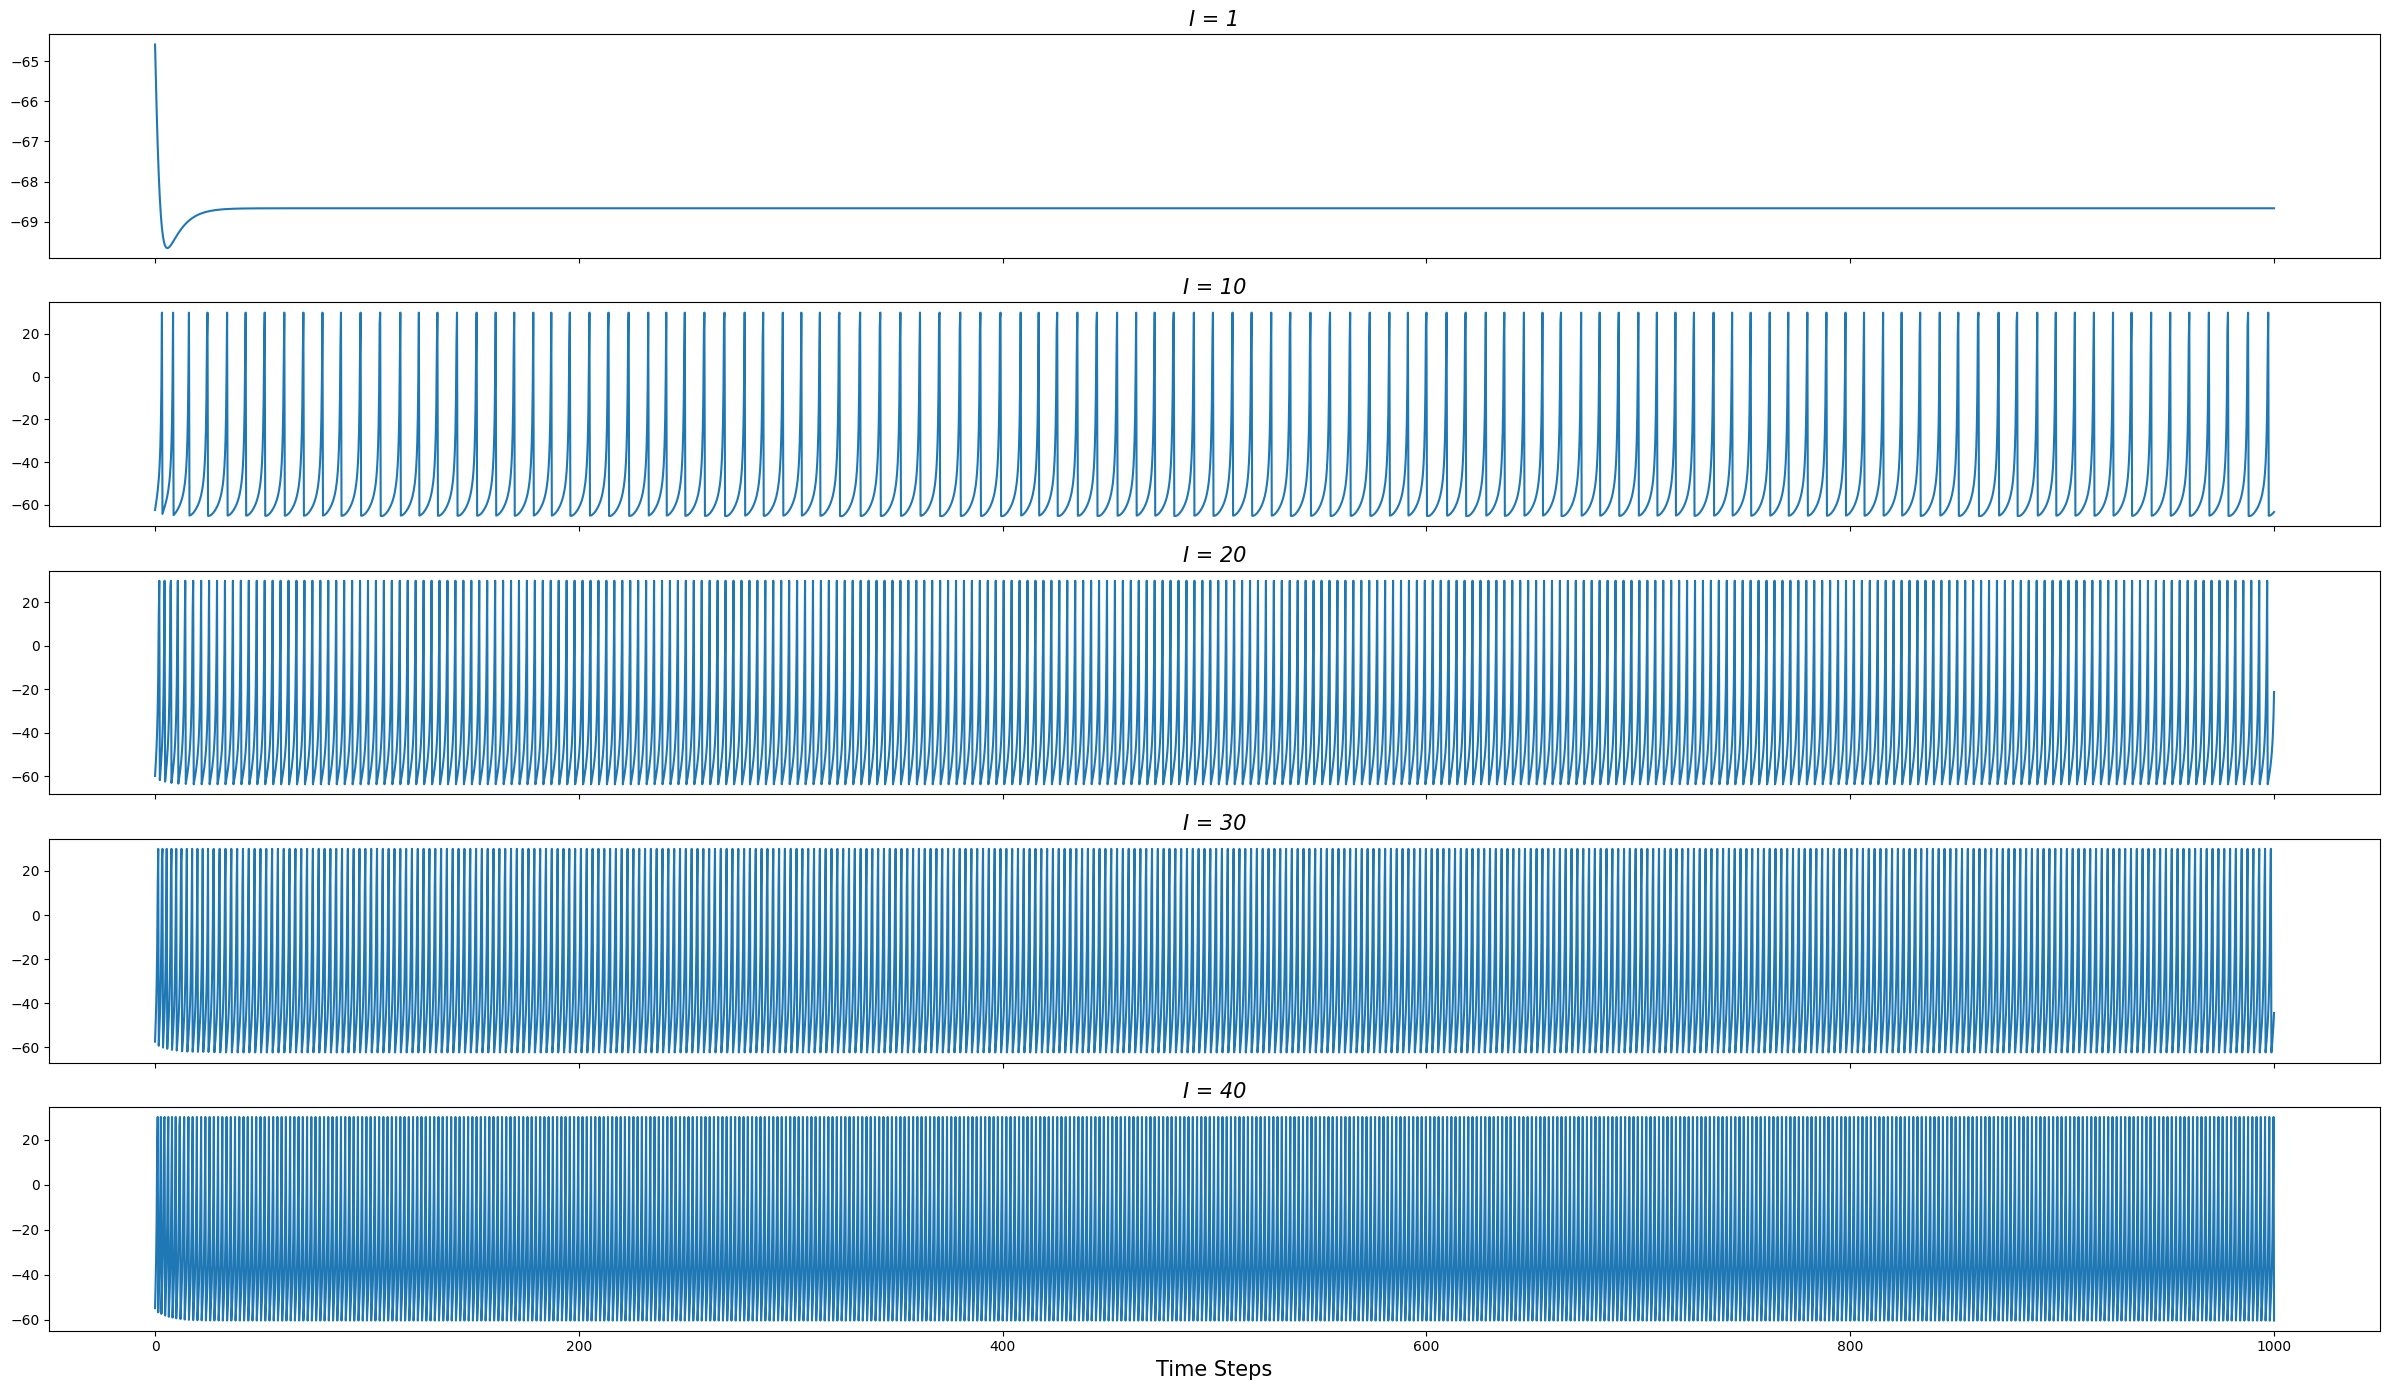

In [38]:
# defined same variable name with different value
data_frame = [0 for _ in range(5)]
a, b, c, d = 0.1, 0.2, -65, 2
fig, axis = plt.subplots(len(data_frame), 1, sharex=True, figsize=(24,14), squeeze=False)
row = 0
FS_II = [1, 10, 20, 30, 40]
FS_RR = []

for i in FS_II:
    R = neuron_spiking(row, a, b, c, d, u, V, [], [], [], I=i)
    row += 1
    FS_RR.append(R)

count = 0    
for j in data_frame:
    axis[count, 0].set_title(f'I = {FS_II[count]}', fontstyle='italic', fontsize=15)
    axis[count, 0].plot(data_frame[count]['x'],data_frame[count]['VV'])
    count += 1    
plt.savefig('../assets/problem2.png')
plt.tight_layout()
plt.show()

Plot comparison the behavior between Fast Spiking Neuron and Regular Spiking Neuron

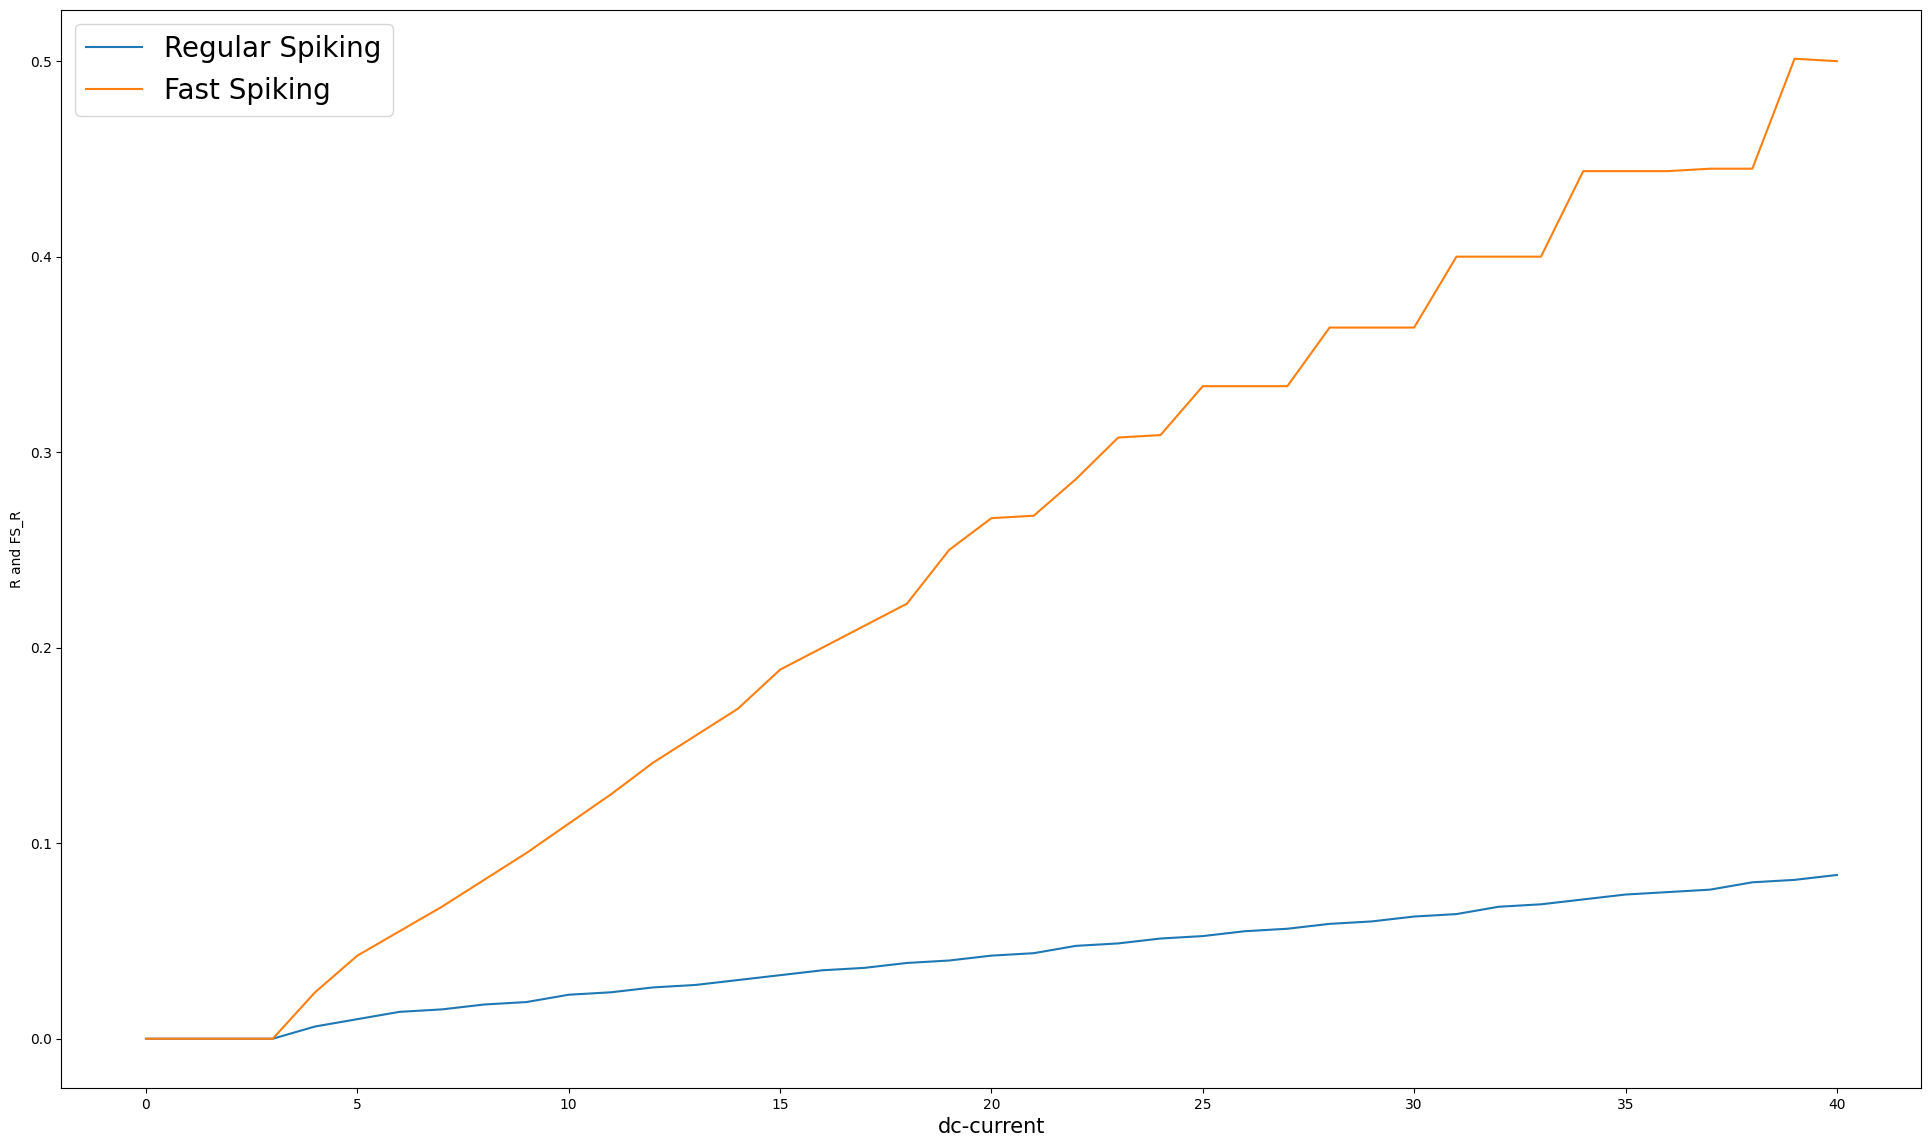

In [39]:
# defined a list contain of 40 values so we 
# can run 40 time of fast spiking to compare with regular spiking
data_frame = [0 for _ in range(41)]
avg_lst = [i for i in range(41)]
fig, ax = plt.subplots(1,1,sharex=True, figsize=(24,14))
fs_rr = []
row = 0
for i in avg_lst:
    R = neuron_spiking(row, a, b, c, d, u, V, [], [], [], I=i)
    row += 1
    fs_rr.append(R)
plt.plot(avg_lst, rr, label='Regular Spiking')
plt.plot(avg_lst, fs_rr, label='Fast Spiking')
plt.legend(prop={'size': 20})
plt.xlabel('dc-current')
plt.ylabel('R and FS_R')
plt.savefig('../assets/compare_striking.png')

# <font color='skyblue'>Problem 3: Chattering Neuron</font>

In [40]:
def neuron_chattering(row, W):
    
    y_a, y_b = 0, 0
    I_a, I_b = 5.0, 2.0
    a, b, c, d = 0.02, 0.2, -50, 2
    V_a = V_b = -65
    VV_a, uu_a, VV_b, uu_b = [], [], [], []
    u_a, u_b = b * V_a, b * V_b 
    
    # The following function below is similar to the one used on Problem 1
    
    for t in np.linspace(0, steps, 4001): # 4001 since we need to draw 5 charts
        
        # These 2 functions below are required for plotting the chattering neuron
        IA = I_a - W * y_b
        IB = I_b + W * y_a
        
        V_a += TAU * (0.04 * (V_a*V_a) + 5 * V_a + 140 - u_a + (IA*1.0))
        V_b += TAU * (0.04 * (V_b*V_b) + 5 * V_b + 140 - u_b + (IB*1.0))
        u_a += TAU * a * (b * V_a - u_a)
        u_b += TAU * a * (b * V_b - u_b)
        
        # update y value
        y_a = 1 if V_a > 30 else 0
        y_b = 1 if V_b > 30 else 0

        if V_a > 30:
            VV_a.append(30)
            V_a = c
            u_a += d
        else:
            VV_a.append(V_a)
            
        if V_b > 30:
            VV_b.append(30)
            V_b = c
            u_b += d
        else:
            VV_b.append(V_b)            

        uu_a.append(u_a)
        uu_b.append(u_b)
      
    axis[row].plot(np.linspace(0, steps, 4001), VV_a, label='Neuron A')
    axis[row].plot(np.linspace(0, steps, 4001), VV_b, label='Neuron B')
    plt.xlabel('Time Steps', fontsize=15)


Plot of Chattering Neuron A and B with W over Time-Series-Step

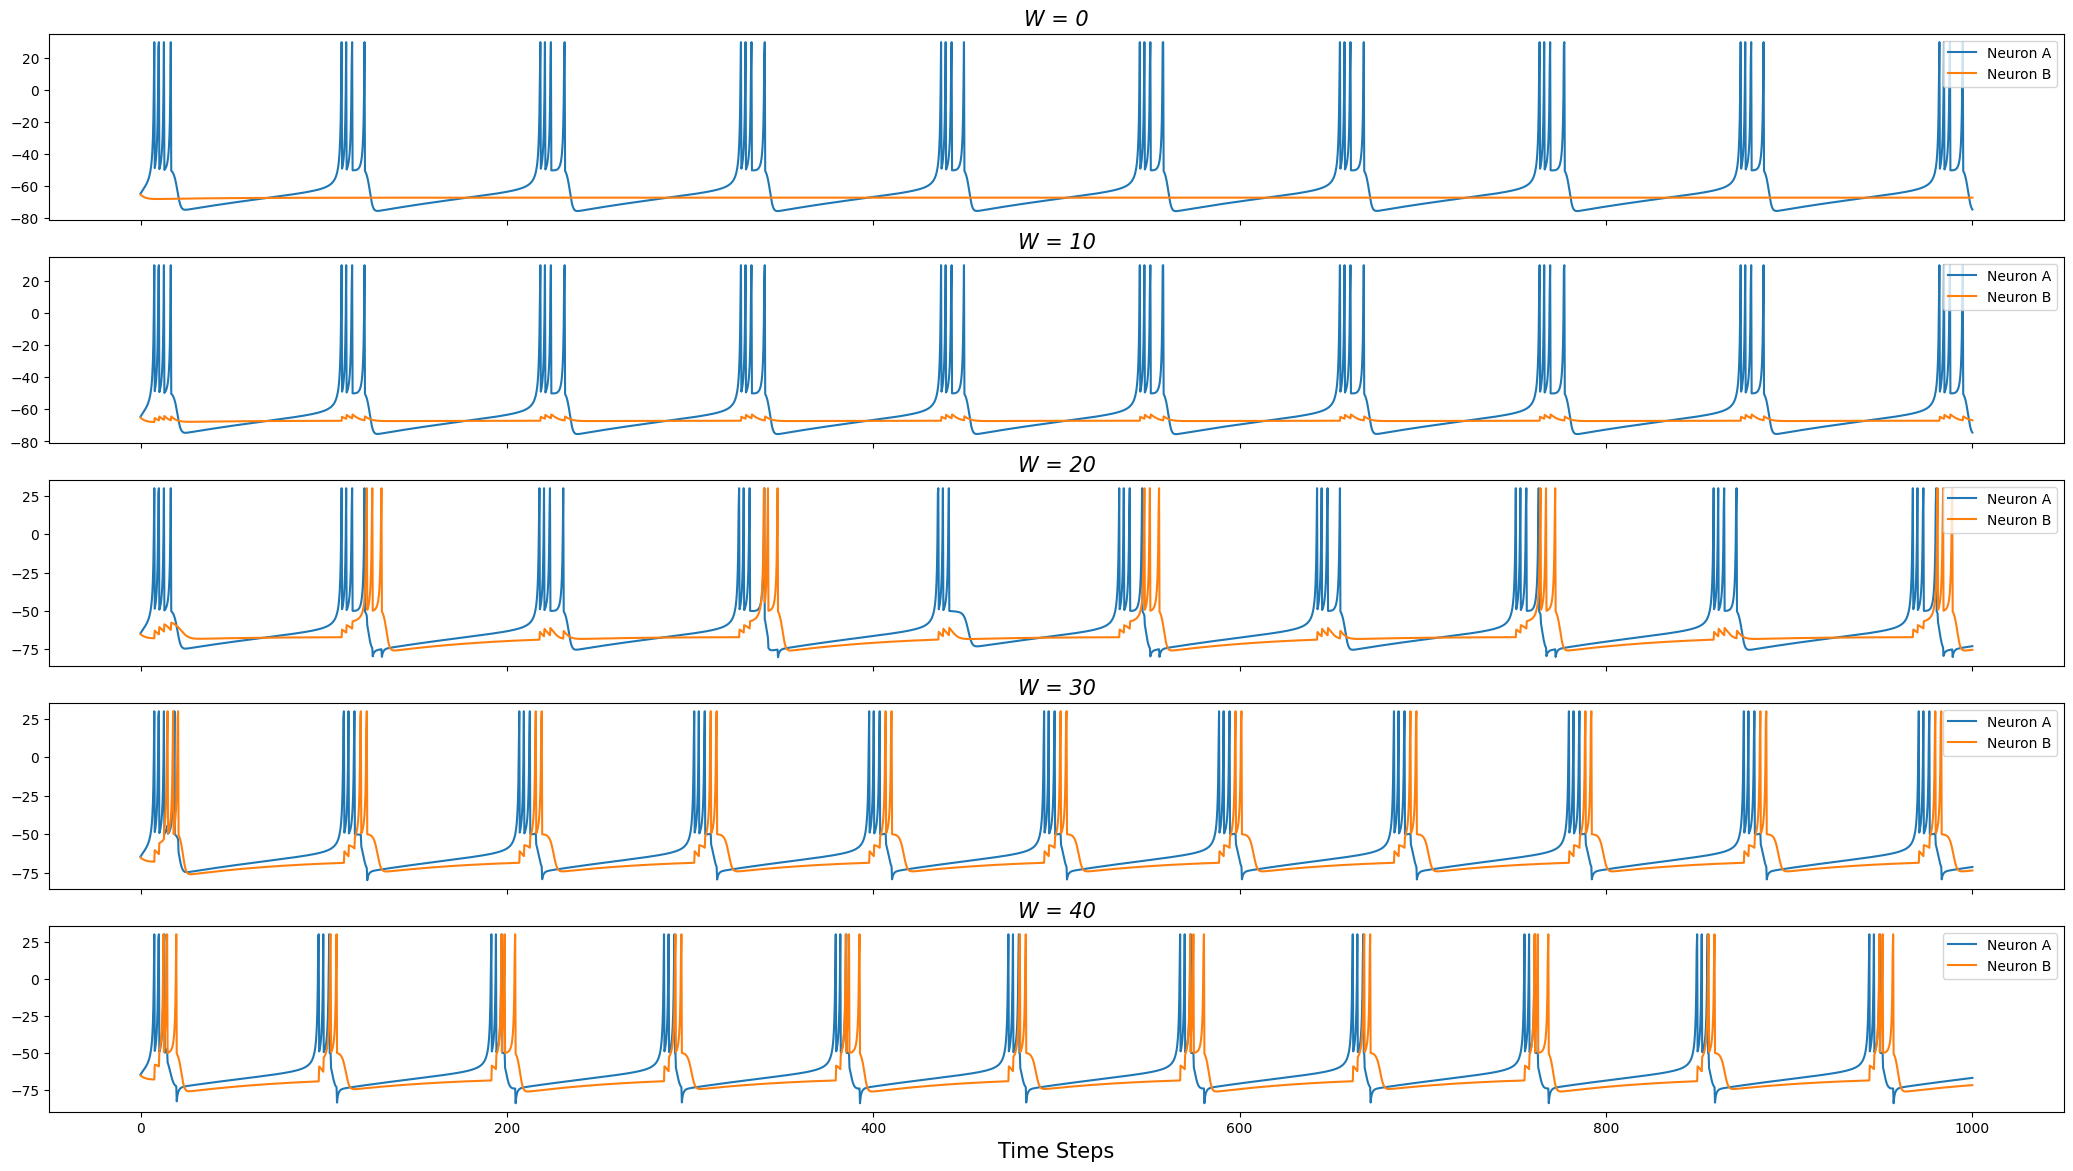

In [41]:
fig, axis = plt.subplots(5, 1, sharex=True, figsize=(26,14))
row = 0
WW = [0, 10, 20, 30, 40]
for w in WW:
    neuron_chattering(row, w)
    axis[row].set_title(f'W = {WW[row]}', fontstyle='italic', fontsize=15)
    axis[row].legend(loc= 'upper right')
    row += 1
plt.savefig('../assets/problem3.png')